In [5]:
#Example 1
import numpy as np
arr = [6, 7, 8, 9]
print(type(arr)) 
a = np.array(arr)
print(type(a)) 
print(a.shape) 
print(a.dtype) 
print(a.ndim) 
b = np.array([[1, 2, 3],[4, 5, 6]])
print(b) 
print(b.ndim) 
b.shape 

<class 'list'>
<class 'numpy.ndarray'>
(4,)
int64
1
[[1 2 3]
 [4 5 6]]
2


(2, 3)

In [6]:
import pandas as pd
days = pd.Series(['Monday', 'Tuesday', 'Wednesday'])
print(days) 

0       Monday
1      Tuesday
2    Wednesday
dtype: object


In [8]:
days = pd.Series(['Monday', 'Tuesday', 'Wednesday'],
index=['a', 'b', 'c'])
print(days)

a       Monday
b      Tuesday
c    Wednesday
dtype: object


In [15]:
#DATAFRAME
df_dict = {'Country': ['Ghana', 'Kenya', 'Nigeria', 'Togo'],
'Capital': ['Accra', 'Nairobi', 'Abuja', 'Lome'],
'Population': [10000, 8500, 35000, 12000],
'Age': [60, 70, 80, 75]
}
df = pd.DataFrame(df_dict, index=[2, 4, 6, 8])
df_list = [['Ghana', 'Accra', 10000, 60],
['Kenya', 'Nairobi', 8500, 70],
['Nigeria', 'Abuja', 35000, 80],
['Togo', 'Lome', 12000, 75]]
df1 = pd.DataFrame(df_list, columns=['Country', 'Capital','Population', 'Age'],
index=[2, 4, 6, 8])
print(df)

   Country  Capital  Population  Age
2    Ghana    Accra       10000   60
4    Kenya  Nairobi        8500   70
6  Nigeria    Abuja       35000   80
8     Togo     Lome       12000   75


In [21]:
csv_df = pd.read_csv('fuel.csv')
csv_df.to_csv('fuel.csv', index=False)
print(csv_df)
excel_df = pd.read_excel('fuel.xlsx')
excel_df.to_excel('fuel.xlsx')
print(excel_df)

                     record_id  utility_id_ferc1  report_year  \
0        f1_fuel_1994_12_1_0_7                 1         1994   
1       f1_fuel_1994_12_1_0_10                 1         1994   
2        f1_fuel_1994_12_2_0_1                 2         1994   
3        f1_fuel_1994_12_2_0_7                 2         1994   
4       f1_fuel_1994_12_2_0_10                 2         1994   
...                        ...               ...          ...   
29518  f1_fuel_2018_12_12_0_13                12         2018   
29519   f1_fuel_2018_12_12_1_1                12         2018   
29520  f1_fuel_2018_12_12_1_10                12         2018   
29521  f1_fuel_2018_12_12_1_13                12         2018   
29522  f1_fuel_2018_12_12_1_14                12         2018   

           plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0                  rockport                coal       ton        5377489.0   
1      rockport total plant                coal       ton      

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'record_i'

In [24]:
url='https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
fuel_data = pd.read_csv(url, error_bad_lines=False)
fuel_data.describe(include='all')
fuel_data.isnull().sum()
fuel_data.groupby('fuel_unit')['fuel_unit'].count()
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')
fuel_data.isnull().sum()
fuel_data.groupby('fuel_type_code_pudl').first()
fuel_df1 = fuel_data.iloc[0:19000].reset_index(drop=True)
fuel_df2 = fuel_data.iloc[19000:].reset_index(drop=True)
assert len(fuel_data) == (len(fuel_df1) + len(fuel_df2))
g = pd.merge(fuel_df1, fuel_df2, how="inner")
h = pd.merge(fuel_df1, fuel_df2, how="outer")
i = pd.merge(fuel_df1, fuel_df2, how="outer")
j = pd.concat([fuel_data, fuel_df1,fuel_df2]).reset_index(drop=True)
fuel_data.duplicated().any()
print(fuel_df1)
print(fuel_df2)
print(g)
print(h)
print(i)
print(j)

                      record_id  utility_id_ferc1  report_year  \
0         f1_fuel_1994_12_1_0_7                 1         1994   
1        f1_fuel_1994_12_1_0_10                 1         1994   
2         f1_fuel_1994_12_2_0_1                 2         1994   
3         f1_fuel_1994_12_2_0_7                 2         1994   
4        f1_fuel_1994_12_2_0_10                 2         1994   
...                         ...               ...          ...   
18995   f1_fuel_2009_12_182_1_9               182         2009   
18996  f1_fuel_2009_12_182_1_10               182         2009   
18997  f1_fuel_2009_12_182_1_13               182         2009   
18998  f1_fuel_2009_12_182_1_14               182         2009   
18999    f1_fuel_2009_12_79_0_1                79         2009   

           plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0                  rockport                coal       ton        5377489.0   
1      rockport total plant                coal    

Text(0.5, 0, 'Fuel Unit')

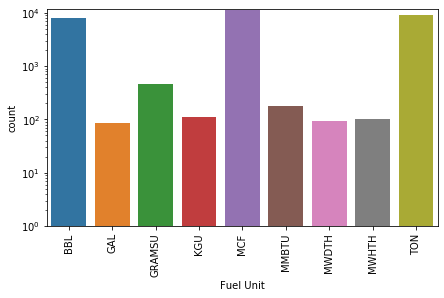

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU',
'MWDTH', 'MWHTH', 'TON'],
'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')
g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

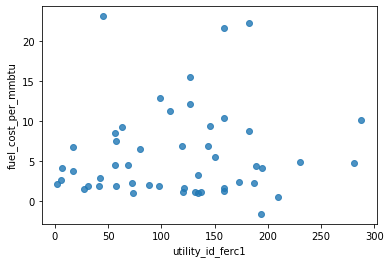

In [28]:
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU',
'MWDTH', 'MWHTH', 'TON'],
'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sample_df = fuel_data.sample(n=50, random_state=4)
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"],
fit_reg=False)

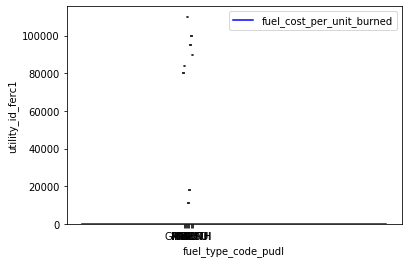

In [37]:
import seaborn as sns
fuel_unit = pd.DataFrame({'fuel_type_code_pudl':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU',
'MWDTH', 'MWHTH', 'TON'],
'utility_id_ferc1':[79980, 84000, 46400, 110000, 11354, 18000, 95000, 100000, 89580]})
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",palette=["m", "g"], data=fuel_unit)
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color="b")